In [2]:
#Numpy
import numpy as np
#Pandas
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

# Part 1
- First, you will prepare the dataset for time series analysis:
    - Load in the Zillow Home Value Index dataframe.
        - Note: it is a large file and may take a minute to load.
    - Filter the 4 largest cities into a new dataframe.
        - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
        - Therefore the 4 largest cities would have rank values of [0,1,2,3]
    - Melt the data to long-form and prepare it for time series analysis.
        - Convert the melted dates into datetime datatype.
        - Make the datetime column the index.
    - Resample the dataframe as monthly frequency, grouped by City.


## Load in the Zillow Home Value Index dataframe.

In [3]:
#URL CSV
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


## Filter the 4 largest cities into a new dataframe.
        
- Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
- Therefore the 4 largest cities would have rank values of [0,1,2,3]
   

In [4]:
df2 = df.loc[df['SizeRank']< 4]
df2.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [5]:
df2['SizeRank'].value_counts()

0    1
1    1
2    1
3    1
Name: SizeRank, dtype: int64

## Melt the data to long-form and prepare it for time series analysis.
- Convert the melted dates into datetime datatype.
- Make the datetime column the index.
    

In [6]:
##  id coluimns
id_vars = df2.columns[:8]
id_vars

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

In [7]:
## Melt the data
long_df = pd.melt(df2, id_vars=id_vars, value_name='HomeValue', var_name='Date')
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomeValue
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [8]:
## Now make Date column datetime 
long_df['Date'] = pd.to_datetime(long_df["Date"])
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [9]:
# Set Date as index
long_df = long_df.set_index('Date')
long_df.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


In [10]:
# confirm cities
long_df['RegionType'].value_counts()

city    1092
Name: RegionType, dtype: int64

## Resample the dataframe as monthly frequency, grouped by City.

In [11]:
# resample by month end for fianl value, by city/region name
city_ts = long_df.groupby('RegionName').resample("M").last()['HomeValue']
city_ts

RegionName  Date      
Chicago     2000-01-31    166139.0
            2000-02-29    166536.0
            2000-03-31    167368.0
            2000-04-30    168826.0
            2000-05-31    170499.0
                            ...   
New York    2022-05-31    768797.0
            2022-06-30    773944.0
            2022-07-31    777692.0
            2022-08-31    779960.0
            2022-09-30    781622.0
Name: HomeValue, Length: 1092, dtype: float64

In [12]:
city_ts.index

MultiIndex([( 'Chicago', '2000-01-31'),
            ( 'Chicago', '2000-02-29'),
            ( 'Chicago', '2000-03-31'),
            ( 'Chicago', '2000-04-30'),
            ( 'Chicago', '2000-05-31'),
            ( 'Chicago', '2000-06-30'),
            ( 'Chicago', '2000-07-31'),
            ( 'Chicago', '2000-08-31'),
            ( 'Chicago', '2000-09-30'),
            ( 'Chicago', '2000-10-31'),
            ...
            ('New York', '2021-12-31'),
            ('New York', '2022-01-31'),
            ('New York', '2022-02-28'),
            ('New York', '2022-03-31'),
            ('New York', '2022-04-30'),
            ('New York', '2022-05-31'),
            ('New York', '2022-06-30'),
            ('New York', '2022-07-31'),
            ('New York', '2022-08-31'),
            ('New York', '2022-09-30')],
           names=['RegionName', 'Date'], length=1092)

# Part 2
- Once you've prepared the dataframe with the time series data for the 4 largest cities:
    - Plot the home values for all 4 cities. (Hint: use unstack)
        - Make sure to add a title and axis labels.
        - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
            - Hint: use the FuncFormatter from matplotlib.
    

In [13]:
df_unstacked = city_ts.unstack(0)
df_unstacked

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,166139.0,109068.0,234181.0,253690.0
2000-02-29,166536.0,109079.0,234401.0,255517.0
2000-03-31,167368.0,108878.0,235513.0,257207.0
2000-04-30,168826.0,108881.0,237589.0,260310.0
2000-05-31,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-31,312487.0,265558.0,990391.0,768797.0
2022-06-30,314663.0,268901.0,992337.0,773944.0
2022-07-31,315910.0,271059.0,992630.0,777692.0


In [14]:
df_unstacked.describe()

RegionName,Chicago,Houston,Los Angeles,New York
count,270.000000,272.000000,273.000000,272.000000
mean,240757.592593,149867.900735,541907.406593,519943.268382
std,40373.241404,37505.371682,176066.984972,130486.941506
min,166139.000000,108834.000000,234181.000000,253690.000000
25%,208180.750000,122918.750000,418700.000000,466244.500000
50%,238558.000000,133810.000000,533443.000000,517534.000000
75%,267622.250000,173061.000000,649814.000000,616399.500000
max,315910.000000,272639.000000,992630.000000,781622.000000


In [15]:
# Function to covert the values to requested format, code found through search

def format_yticks(value, pos):
    """
    Format y-axis ticks in "200K" format.
    """
    if value >= 1e6:
        value = value / 1e6
        return f"{value:.0f}M"
    elif value >= 1e3:
        value = value / 1e3
        return f"{value:.0f}K"
    else:
        return f"{value:.0f}"


''

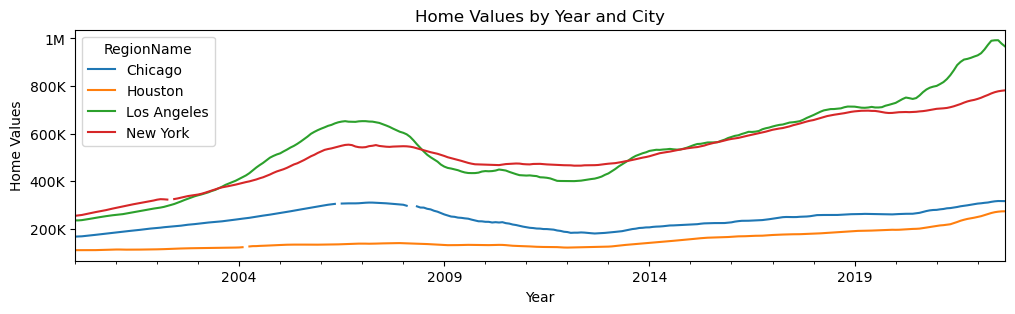

In [16]:
# df to plot
ax = df_unstacked.plot(figsize=(12,3))
# Title ans lables
ax.set(title='Home Values by Year and City', ylabel='Home Values', xlabel= 'Year')
# Format for prices
ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_yticks))
;

# Answer the following 2 questions using pandas:

1. Which City had the highest Typical Home Value at the end of 2008? Which had the least?
    - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.


In [17]:
# Filter out values for 2008
df_unstacked.loc[pd.IndexSlice[:, '2008']]

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-01-31,300207.0,138208.0,603029.0,546538.0
2008-02-29,296063.0,137512.0,596635.0,546098.0
2008-03-31,NaN,136795.0,586065.0,544562.0
2008-04-30,NaN,136628.0,571226.0,541865.0
2008-05-31,293467.0,136228.0,554589.0,537685.0
2008-06-30,288495.0,135773.0,539622.0,533810.0
2008-07-31,288174.0,135392.0,524220.0,529211.0
2008-08-31,283199.0,134770.0,510520.0,525290.0
2008-09-30,280695.0,133932.0,500124.0,521347.0


## Q1 Answer:

- New York had the highest home value of 510,309 dollars at the end of 2008.
- Houston had the lowest home value at the end of 2008 at 131,283 dollars.

# Question: Not sure how to code this 

2. How much did the home values change from November 2008 to December 2008 (in dollars)?
    - Hint: you can use .diff() to calculate the change in values

In [26]:
# Filter for only 2008
year_df = df_unstacked.loc['2008']
year_df.tail()

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-08-31,283199.0,134770.0,510520.0,525290.0
2008-09-30,280695.0,133932.0,500124.0,521347.0
2008-10-31,274849.0,133189.0,490979.0,518048.0
2008-11-30,271059.0,132247.0,481905.0,514767.0
2008-12-31,265306.0,131283.0,469294.0,510309.0


In [23]:
# Use .diff() to calculate the change in values
mon_diff = year_df.diff()
mon_diff

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-01-31,NaN,NaN,NaN,NaN
2008-02-29,-4144.0,-696.0,-6394.0,-440.0
2008-03-31,NaN,-717.0,-10570.0,-1536.0
2008-04-30,NaN,-167.0,-14839.0,-2697.0
2008-05-31,NaN,-400.0,-16637.0,-4180.0
2008-06-30,-4972.0,-455.0,-14967.0,-3875.0
2008-07-31,-321.0,-381.0,-15402.0,-4599.0
2008-08-31,-4975.0,-622.0,-13700.0,-3921.0
2008-09-30,-2504.0,-838.0,-10396.0,-3943.0


In [24]:
# Sum up the values for total difference 
(-5753.0) + (-964.0) + (-12611.0)  + (-4458.0)

-23786.0

## Q2 Answer: 
- The change in home values across all four citied from November to December of 2008 was a decrease of $23,786.